# H&M Rocommendations Project

Maybe create a new Anaconda environment for this project from the "HM_Recommendations.yaml" file.

In [1]:
# import everything that's needed to exlore the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

I will not include the folder "data" containing the starting csv files in this repository. They can be downloaded from here: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data

In [2]:
# loading all data
def load_articles():
    """
    Loads 'articles.csv'.

    Returns:
        articles_data (dataframe): 
    """
    articles_data = pd.read_csv("articles.csv")
    return articles_data

def load_customers():
    """
    Loads 'customers.csv'.

    Returns:
        customers_data (dataframe): 
    """
    customers_data = pd.read_csv("customers.csv")
    return customers_data

def load_transactions_train():
    """
    Loads 'transactions_train.csv'.

    Returns:
        transaction_training_data (dataframe): 
    """
    transaction_training_data = pd.read_csv("transactions_train.csv")
    return transaction_training_data

def load_all_data():
    """
    Loads all three csv data files.

    Returns:
        (articles_data, customers_data, transaction_training_data) (three dataframes): 
    """
    articles_data = load_articles()
    customers_data = load_customers()
    transaction_training_data = load_transactions_train()
    return articles_data, customers_data, transaction_training_data

## Understanding the data

### articles.csv

In [14]:
articles_data = load_articles()

Everything I know for articles.csv:
- Unique id for every article of clothing
- Only "detail_desc" has missing values 
- "detail_desc" might not be that detailed after all. Seems like it is the same for many of the products.
- two columns have the same function, mostly (numbers, strings)
  - "graphical_appearance_no", "graphical_appearance_name"
    - "-1" is the same as "Unknown"
  - "colour_group_code", "colour_group_name"
    - "-1" is the same as "Unknown"
  - "perceived_colour_value_id", "perceived_colour_value_name"
    - "-1" is the same as "Unknown"
  - "perceived_colour_master_id", "perceived_colour_master_name"
    - "-1" is the same as "Unknown"
  - "index_code", "index_name"
    - "index_code" is capital letters not numbers, both have 10 categories
  - "index_group_no", "index_group_name"
    - these have 5 categories
  - "garment_group_no", "garment_group_name"
    - these have 21 categories
- "department_no" is almost the same as "department_name" only with 4 more categories
- "section_no" is almost the same as "section_name" only with 1 more category
- NOT the same, regardless of the name
  - "product_code", "product_name"
  - "product_type_no", "product_type_name
  
Most correlated columns (> 0.1):
  - "garment_group_no" and "product_type_no": -0.461593 
  - "department_no" and "index_group_no" : 0.453340
  - "department_no" and "section_no": 0.349181
  - "garment_group_no" and "section_no": 0.217788
  - "perceived_colour_master_id" and "colour_group_code": -0.177083
  - "index_group_no" and "garment_group_no": -0.144313
  - "department_no" and "colour_group_code": 0.119798
  - "section_no" and "product_type_no": -0.118532
  
Categories:
- Ladieswear has the most articles. Combined, the two children categories have the second most articles. Sport category has the least articles.
  
Sections: 
- Women's Everyday Collection has the most articles along with Divided Collection. Ladies Other has the least number of articles
  
Garment groups: 
- Jersey Fancy is the most popular garment group. Dressed and Special Offers have the least number of articles

Colours: 
- Black has almost twice the number of articles in second place. Dark Blue and White are the next most popular colours overall.
  
Graphics: 
- Solid is single-handedly at the top. All over pattern is single-handedly second. 

In [15]:
def show_info(df):
    """
    Prints the .info() and .shape() of the given dataframe.
    
    Args: 
        df (dataframe): The dataframe of which to show info. 
    """
    print("\nInfo: ")
    print(df.info())
    print("\nShape: ", df.shape)

# info
print("articles.csv:")
show_info(articles_data)

articles.csv:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542

Thoughts: 
- Looks like only "detail_desc" has any missing values. Will not impute them (maybe just add a boolean column for missing). ----- DONE

In [16]:
articles_data.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Thoughts:
- "detail_desc" might not be that detailed after all
  - Seems like its is the same for many of the products
- have the same function (numbers, strings)
  - Check all of these
  - "product_code", "product_name" ----- NOT THE SAME
    - I don't know how to use one of these
    - Should probably use both of these
  - "product_type_no", "product_type_name" ----- NOT THE SAME
    - The same distribution, but 662 "57" is not 662 "Swimsuit"
    - Should probably use both of these
  - "graphical_appearance_no", "graphical_appearance_name" ----- THE SAME
    - "-1" means "Unknown" --- Confirmed
  - "colour_group_code", "colour_group_name"----- THE SAME
    - "-1" means "Unknown" --- Confirmed
  - "perceived_colour_value_id", "perceived_colour_value_name"----- THE SAME
    - "-1" means "Unknown" --- Confirmed
  - "perceived_colour_master_id", "perceived_colour_master_name"----- THE SAME
    - "-1" means "Unknown" --- Confirmed
  - "department_no", "department_name" ----- NOT THE SAME
    - "department_no" has 4 more categories
  - "index_code", "index_name" ----- THE SAME
    - "index_code" is capital letters insted of numbers
    - have 10 categories
  - "index_group_no", "index_group_name" ----- THE SAME
    - have 5 categories
  - "section_no", "section_name" ----- NOT THE SAME
    - "section_no" has 1 more category
  - "garment_group_no", "garment_group_name" ----- THE SAME
    - have 21 categories

- maybe don't use "department_name" because "department_no" is almost the same only with 4 more categories
- maybe don't use "section_name" because "section_no" is almost the same only with 1 more category

- "product_group_name" and "detail_desc" are the only features which do not have a numeric couterpart
  - If they have little categories, maybe just encode them as well as "index_code" and use only numbers.
  - "product_group_name" has 19 categories
  - Check if "product_type_name" and "product_name" can be encoded
    - have too many categories (I won't touch them for now)
  - "detail_desc" has ~43000 ----- NOT USING THESE

In [17]:
articles_data.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [18]:
# check previous theories here ...

In [19]:
# Do all thoughts
# NOT SURE IF I WILL USE THESE CHANGES 

def my_changes_to_articles(articles_data, encode=False):
    """
    Applies all changes I felt are usefull to the articles_data.

    Args:
        articles_data (dataframe): The original dataframe.
        
        encode (Bool): Should the "index_code" be encoded with One Hot Encoder. (False if not specified)
    Returns:
        articles_data_new (dataframe): The changed datarame.
    """
    # make a copy of the original data before changing it
    articles_data_copy = articles_data.copy()
    # add a column that indicates whether the "detail_desc" column is non-null or not
    articles_data_copy["has_desc"] = articles_data['detail_desc'].notnull()
    # Remove pratically repeated columns 
    columns_to_drop = ["department_name", "section_name", "detail_desc",
                    "garment_group_name", "index_group_name", 
                    "index_name", "perceived_colour_master_name",
                    "perceived_colour_value_name", "colour_group_name",
                    "graphical_appearance_name"]
    articles_data_copy.drop(columns_to_drop, axis='columns', inplace=True)
    if encode :
        # Encode "index_code"
        # use OneHotEncoder because there is nno logical ordering in "index_code"
        from sklearn.preprocessing import OneHotEncoder
        ohe = OneHotEncoder()
        columns_to_ohe = ["index_code"]
        ohe_data = ohe.fit_transform(articles_data_copy[columns_to_ohe]).toarray()
        ohe_df = pd.DataFrame(ohe_data, columns=ohe.categories_)
        articles_data_copy = pd.concat([articles_data_copy, ohe_df], axis=1)
    
    return articles_data_copy


In [20]:
# Seperate numeric and categorical
def separate_numeric_categorical(dataframe):
    """
    Separates numeric and categorical columns of a given dataframe.

    Args:
        dataframe (dataframe): The dataframe to separate.

    Returns:
        numeric_cols (list): The names of the numeric columns.
        
        categorical_cols (list): The names of the categorical columns.
    """
    numeric_cols = []
    categorical_cols = []

    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64']:
            numeric_cols.append(col)
        else:
            categorical_cols.append(col)

    return numeric_cols, categorical_cols

numeric_cols, categorical_cols = separate_numeric_categorical(articles_data)

articles_df_numeric = articles_data[numeric_cols]
articles_df_categorical = articles_data[categorical_cols]

C:\Users\ivoil\AppData\Local\Temp\ipykernel_14560\1215965535.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(numeric_df.corr())
C:\Users\ivoil\AppData\Local\Temp\ipykernel_14560\1215965535.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cors = numeric_df.corr()


                            product_type_no  colour_group_code  \
product_type_no                         NaN                NaN   
colour_group_code                       NaN                NaN   
perceived_colour_master_id              NaN          -0.177083   
department_no                           NaN           0.119798   
index_group_no                          NaN                NaN   
section_no                        -0.118532                NaN   
garment_group_no                  -0.461593                NaN   

                            perceived_colour_master_id  department_no  \
product_type_no                                    NaN            NaN   
colour_group_code                            -0.177083       0.119798   
perceived_colour_master_id                         NaN            NaN   
department_no                                      NaN            NaN   
index_group_no                                     NaN       0.453340   
section_no                       

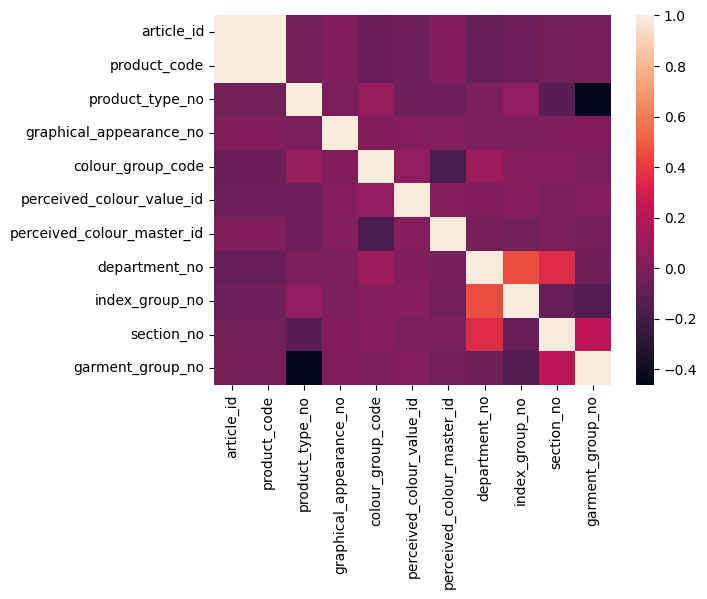

In [21]:
# distributions for the numeric variables
def histograms_for_numeric(numeric_df):
    """
    Creates histograms for all columns in the given dataframe.

    Args:
        numeric_df (dataframe): Dataframe with numeric variables to plot.
    """
    columns_not_to_plot = ["article_id"]
    for column in numeric_df.columns:
        if column not in columns_not_to_plot:
            plt.hist(numeric_df[column])
            plt.title(column)
            plt.show()

# correlations for numeric variables 
def show_correlation_numerical(numeric_df, threshold=0.1):
    """
    First, creates a heatmap for a numerical dataframe. 
    Second, prints a simplified version of the correlation dataframe where
    the values which are under the threshold are removed.

    Args:
        numeric_df (dataframe): Dataframe with numeric variables to plot.
        
        threshold (float): The threshold under which the correlation values are removed. (0.1 if not specified)
    """
    sns.heatmap(numeric_df.corr())
        
    cors = numeric_df.corr()
    # make all correlations which are less than the threshold, NaN
    threshold_cors = cors[abs(cors) > threshold]
    # remove perfect correlation
    for col in threshold_cors.columns:
        threshold_cors[col].values[threshold_cors[col] > 0.9999] = np.nan
    # drop the null values
    threshold_cors.dropna(how="all", axis=1, inplace=True)
    threshold_cors.dropna(how="all", inplace=True)
    
    print(threshold_cors)

show_correlation_numerical(articles_data)

Most correlated (> 0.1):

  "garment_group_no" and "product_type_no": -0.461593 
    
  "department_no" and "index_group_no" : 0.453340
  
  "department_no" and "section_no": 0.349181
  
  "garment_group_no" and "section_no": 0.217788
  
  "perceived_colour_master_id" and "colour_group_code": -0.177083
  
  "index_group_no" and "garment_group_no": -0.144313
  
  "department_no" and "colour_group_code": 0.119798
  
  "section_no" and "product_type_no": -0.118532


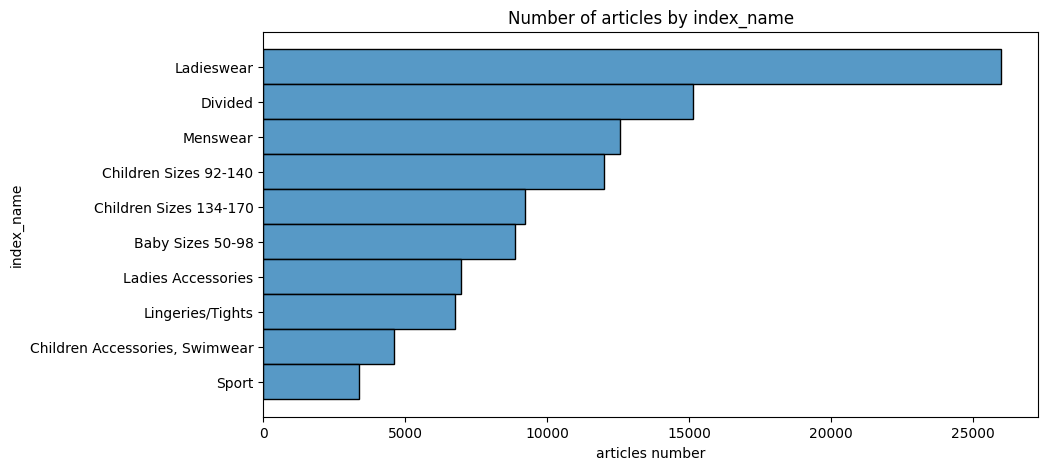

In [22]:
# Find the most popular categories

# make a copy of the original data before changing it
articles_data_copy = articles_data.copy()

# order "index_name"
ordered_index_names = articles_data_copy['index_name'].value_counts().index
articles_data_copy['index_name'] = pd.Categorical(articles_data_copy['index_name'], categories=ordered_index_names, ordered=True)

# Plot histogram
def plot_hist(df, column, figsize=(10, 10)):
    """
    This function takes a pandas DataFrame as input and creates a histogram plot using the seaborn library. 
    The plot shows the distribution of the number of articles for each index name in the DataFrame.

    Args:
        column (str): The name of the column to plot.
        
        df (dataframe): The dataframe to be plotted. 
        
        figsize (integer pair): The size of the plot.
    """
    f, ax = plt.subplots(figsize=figsize)
    sns.histplot(data=df, y=column)
    ax.set_xlabel('articles number')
    ax.set_ylabel(column)
    ax.set_title(f"Number of articles by {column}")
    plt.show()

plot_hist(articles_data_copy, "index_name", (10,5))

Thoughts: 
- Ladieswear has the most articles. 
- Combined, the two children categories have second most articles.
- Sport category has the least articles.

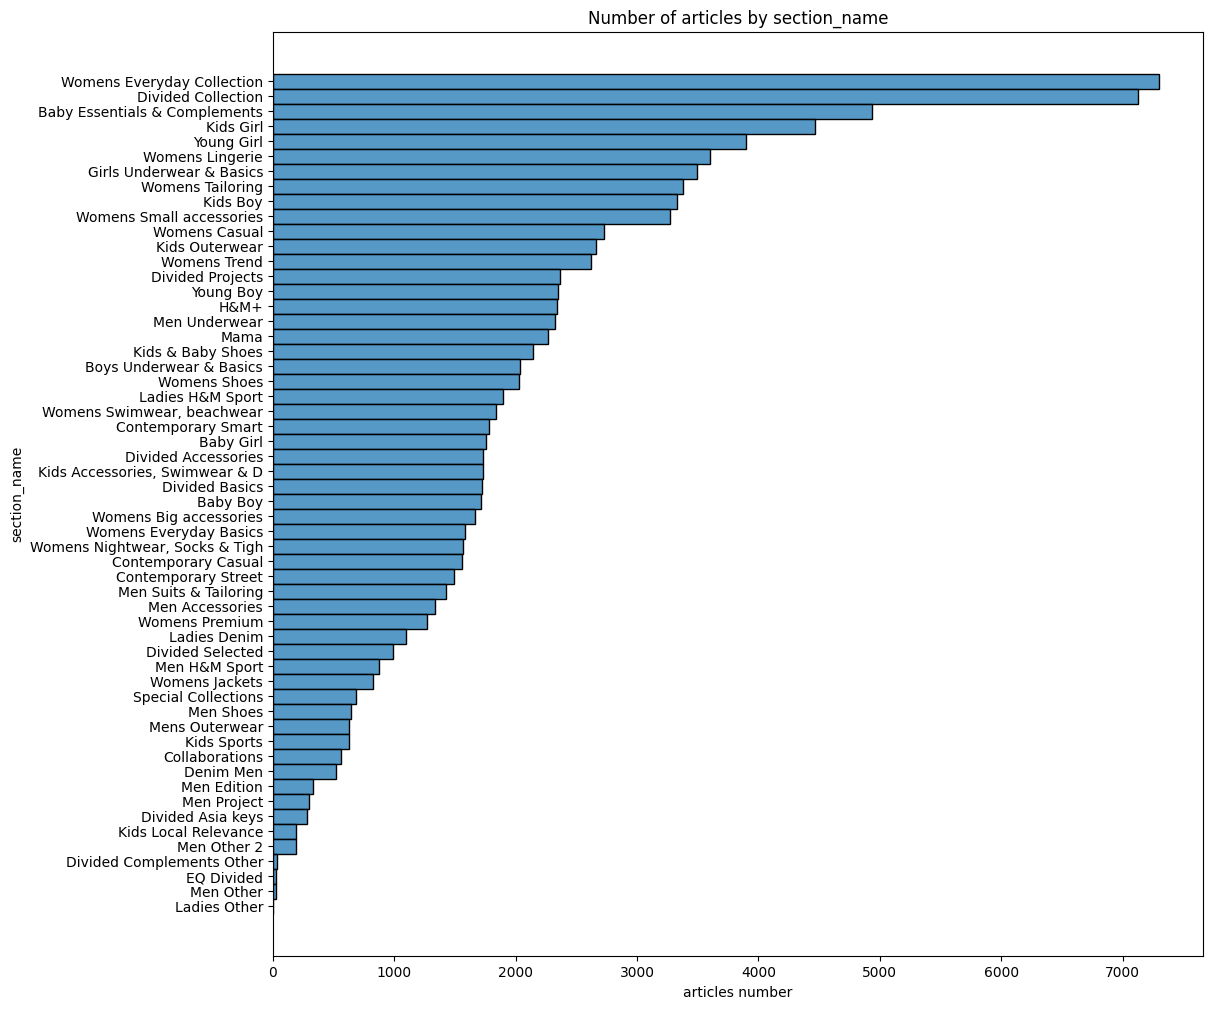

In [23]:
# Find the most popular sections

# order "index_name"
ordered_section_names = articles_data_copy['section_name'].value_counts().index
articles_data_copy['section_name'] = pd.Categorical(articles_data_copy['section_name'], categories=ordered_section_names, ordered=True)

plot_hist(articles_data_copy, "section_name", (12, 12))

Thoughts: 
- Women's Everyday Collection has the most articles along with Divided Collection
- Ladies Other has the least number of articles


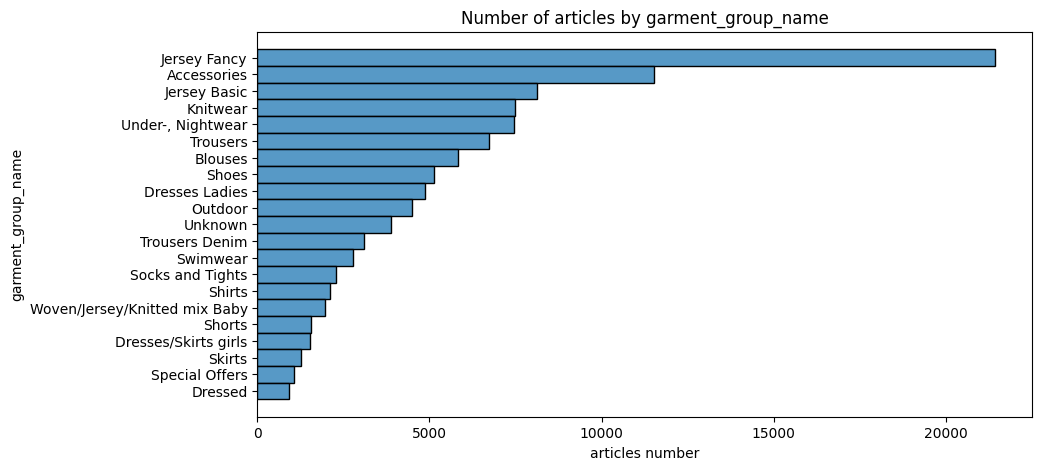

In [24]:
# Find the most popular garment groups
ordered_garment_group_names = articles_data_copy['garment_group_name'].value_counts().index
ordered_index_group_names = articles_data_copy['index_group_name'].value_counts().index
articles_data_copy['garment_group_name'] = pd.Categorical(articles_data_copy['garment_group_name'], categories=ordered_garment_group_names, ordered=True)
articles_data_copy['index_group_name'] = pd.Categorical(articles_data_copy['index_group_name'], categories=ordered_index_group_names, ordered=True)

plot_hist(articles_data_copy, "garment_group_name", (10, 5))

Thoughts: 
- Jersey Fancy are the most popular garment groups.
- Dressed and Special Offers have least number of articles.

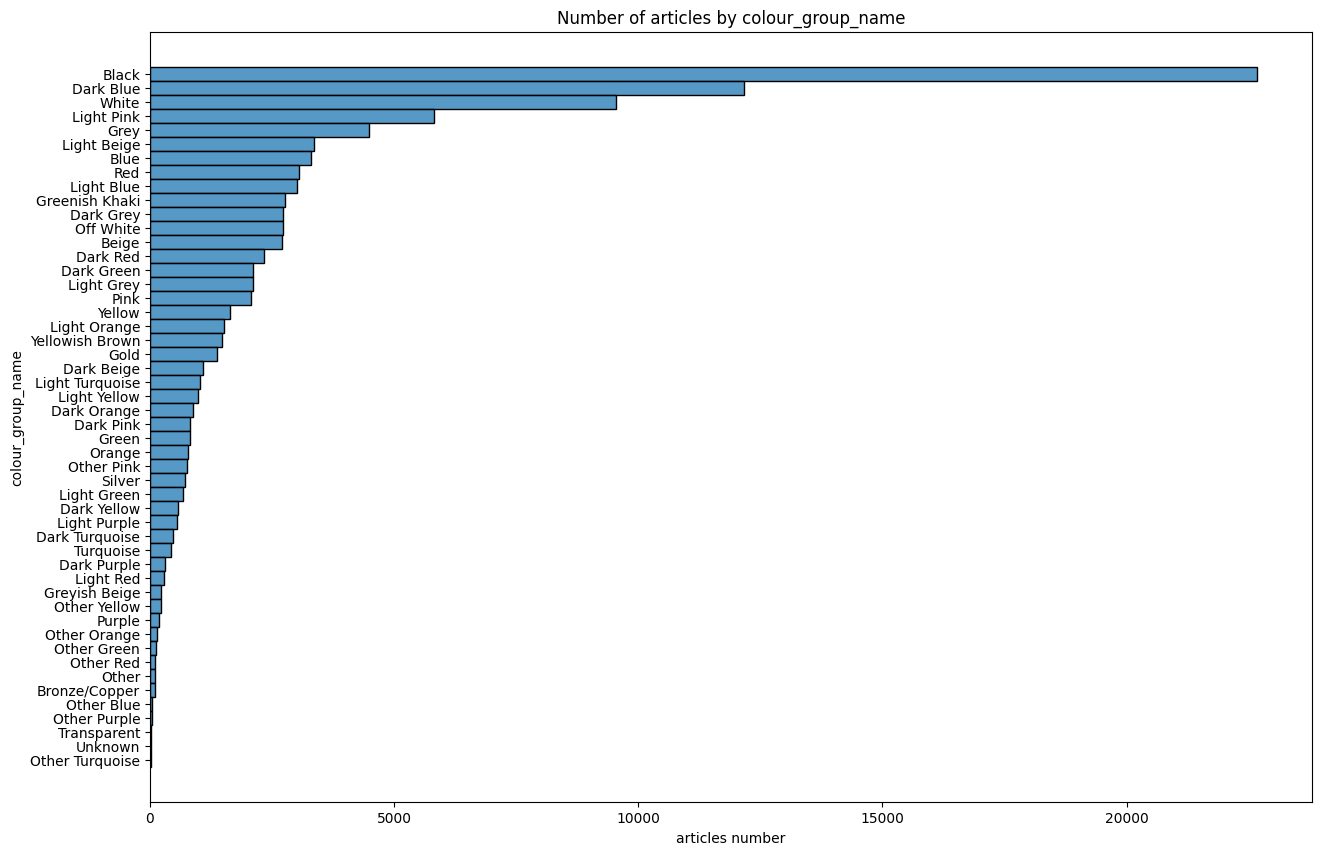

In [25]:
# Find the most popular colours
ordered_colour_names = articles_data_copy['colour_group_name'].value_counts().index
articles_data_copy['colour_group_name'] = pd.Categorical(articles_data_copy['colour_group_name'], categories=ordered_colour_names, ordered=True)

plot_hist(articles_data_copy, "colour_group_name", (15,10))

Thoughts:
- Black has almost twice the number of articles of second place. 
- Dark Blue and White are the next most popular colours overall.

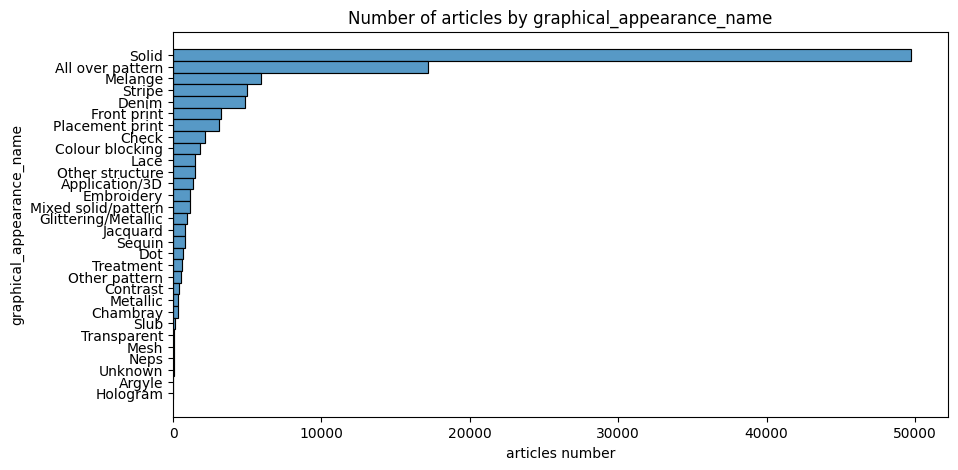

In [26]:
# Find the most popular graphics
count_by_graphical_appearance = articles_data_copy['graphical_appearance_name'].value_counts().index
articles_data_copy["graphical_appearance_name"] = pd.Categorical(articles_data_copy['graphical_appearance_name'], categories=count_by_graphical_appearance,
                                                                 ordered=True)

plot_hist(articles_data_copy, "graphical_appearance_name", (10,5))

Thoughts:
- Solid is single handedly at the top. 
- All over pattern is single handedly second. 

### customers.csv

In [27]:
customers_data = load_customers()

Everything I know for customers.csv:
- Unique id for every customer
- "FN" 1 if the customer receives fashion news (I beleive)
- "fashion_news_frequency": 'Regularly', 'Monthly', 'None'
- "Active" 1 if the customer is active for communication (I beleive)
- "club_member_status": 'ACTIVE', 'PRE-CREATE', 'LEFT CLUB'  
  
FN news:
- Majority are not subscribed.

Age:
- Most customers are 18-25
  
Club status:
- 93% have active club status. Very few people have left.


In [28]:
customers_data.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Thoughts:
- "postal_code" is probably useless (check if it is)

In [29]:
customers_data["fashion_news_frequency"].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

Apparently there are two categories with the same meaning: "NONE" and "None".

In [30]:
def my_changes_to_customers(customers_data):
    """
    Applies all changes I felt are usefull to the customers_data.

    Args:
        customers_data (dataframe): The original data.

    Returns:
        customers_data_copy (dataframe): The new data.
    """
    # make a copy of the original data before changing anything
    customers_data_copy = customers_data.copy()
    # there are a few entries with "none" insted of "NONE", change them so they are the same
    condition = customers_data_copy["fashion_news_frequency"] != "None"
    customers_data_copy["fashion_news_frequency"] = customers_data_copy["fashion_news_frequency"].where(condition, "NONE")
    
    return customers_data_copy

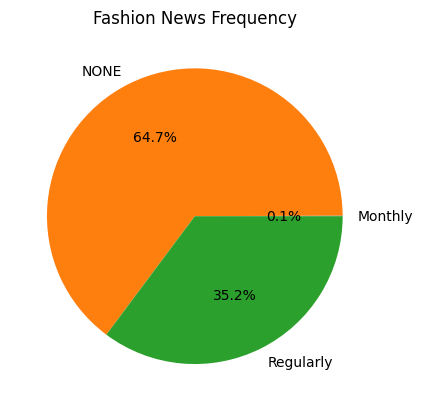

In [31]:
# Distribution of FN frequecy

# Group the customers by FN frequency
customers_data_changed = my_changes_to_customers(customers_data)
fnf_group = customers_data_changed.groupby("fashion_news_frequency")["customer_id"].count()

# Pie chart
plt.pie(fnf_group, labels=fnf_group.index, autopct='%1.1f%%')
plt.title('Fashion News Frequency')
plt.show()

Thoughts:
- Majority are not subscribed.

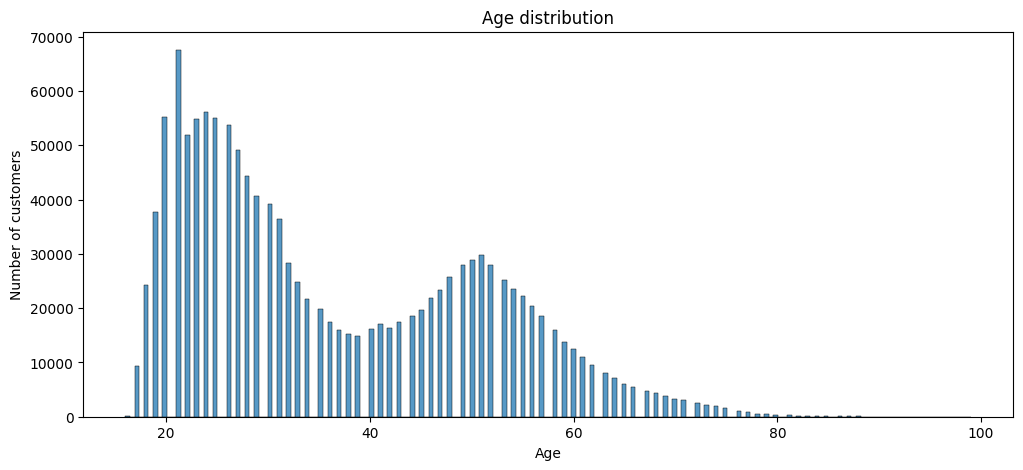

In [32]:
# age distribution
f, ax = plt.subplots(figsize=(12,5))
sns.histplot(data=customers_data_changed, x="age")
ax.set_title("Age distribution")
ax.set_ylabel("Number of customers")
ax.set_xlabel("Age")
plt.show()

Thoughts:
- Most customers are 18-25

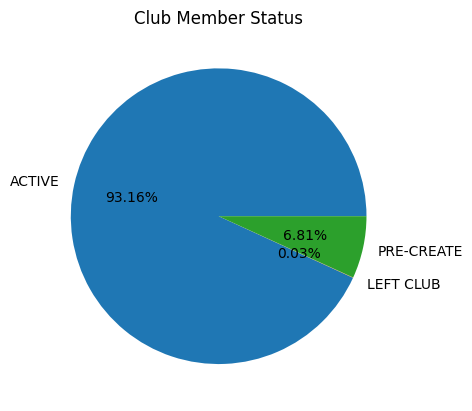

In [33]:
# club member status distribution

# Group the customers by club member status
club_member_groups = customers_data_changed.groupby('club_member_status')["customer_id"].count()

# Pie chart
plt.pie(club_member_groups, labels=club_member_groups.index, autopct='%1.2f%%')
plt.title('Club Member Status')
plt.show()

Thoughts:
- 93% have active club status. 
- Very few people have left.

### transactions_train.csv

Everything I know:
- t_dat
  - date of the transaction (yyyy-mm-dd)
  - 2020-09-22 - the last date for which we have data
- price
  - not a currency
- sales_channel_id:  1 - in-person, 2 - online
  - Online sales are two times more than in-person overall, three times in the last 6 months

In [34]:
# load transactions
transaction_data = load_transactions_train()

In [35]:
transaction_data.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


Thoughts:
- t-dat - data of transaction
- customer_id as in customers.csv
- article_id as in articles.csv
- price - not a currency (check distribution)
- 2020-09-22 - the last date for which we have data

In [36]:
# check if "t_dat" is string(object) - yep
transaction_data["t_dat"].dtype

dtype('O')

In [37]:
def my_changes_to_transaction(transaction_data):
    """
    Applies all changes I think are useful to transaction data.

    Args:
        transaction_data (dataframe): The dataframe to change.

    Returns:
        transaction_data_copy: The changed dataframe.
    """
    # make a copy before changing 
    transaction_data_copy = transaction_data.copy()
    # change to datetime
    transaction_data_copy['t_dat'] = pd.to_datetime(transaction_data_copy['t_dat'])

    return transaction_data_copy

# check if its fine
transaction_data_changed = my_changes_to_transaction(transaction_data)
transaction_data_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


Thoughts:
- Maybe use only the most recent data - 4 months or something

In [38]:
# get data for the last four months
def get_recent_data(transaction_data, months=4):
    """
    Returns only data from the last months. How many months can be chosen (4 if not defined).

    Args:
        transaction_data (dataframe): The dataframe to filter.
        
        months (int): The months offset number.

    Returns:
        new_data (dataframe): The dataframe containing only recent data.
    """
    # get the last date in the database
    last_date = transaction_data["t_dat"].max()
    # offset by specific time 
    some_time_ago = last_date - pd.DateOffset(months=months)
    # filter dataframe
    new_data = transaction_data[transaction_data["t_dat"] >= some_time_ago]
    
    return new_data

In [40]:
transaction_data_4_months = get_recent_data(transaction_data_changed)

In [41]:
transaction_data_4_months["sales_channel_id"].value_counts()

2    3712269
1    1995153
Name: sales_channel_id, dtype: int64

Thoughts:
- sales_channel_id - Online sales are almost three times more than in-person for the last 6 months

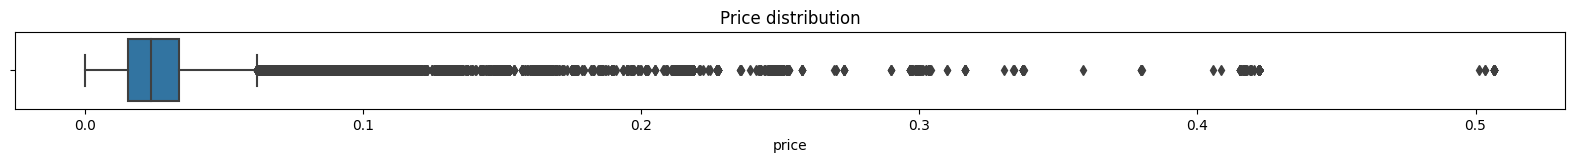

In [44]:
# price distribution
f, ax = plt.subplots(figsize=(20,1))
ax.set_title('Price distribution')
sns.boxplot(transaction_data_4_months, x="price")
plt.show()
pd.set_option('display.float_format', '{:.4f}'.format)

In [45]:
transaction_data_4_months["price"].describe()

count   5707422.0000
mean          0.0263
std           0.0173
min           0.0000
25%           0.0152
50%           0.0236
75%           0.0339
max           0.5068
Name: price, dtype: float64

Thoughts:
- none basically

Text(0, 0.5, 'Number of transactions')

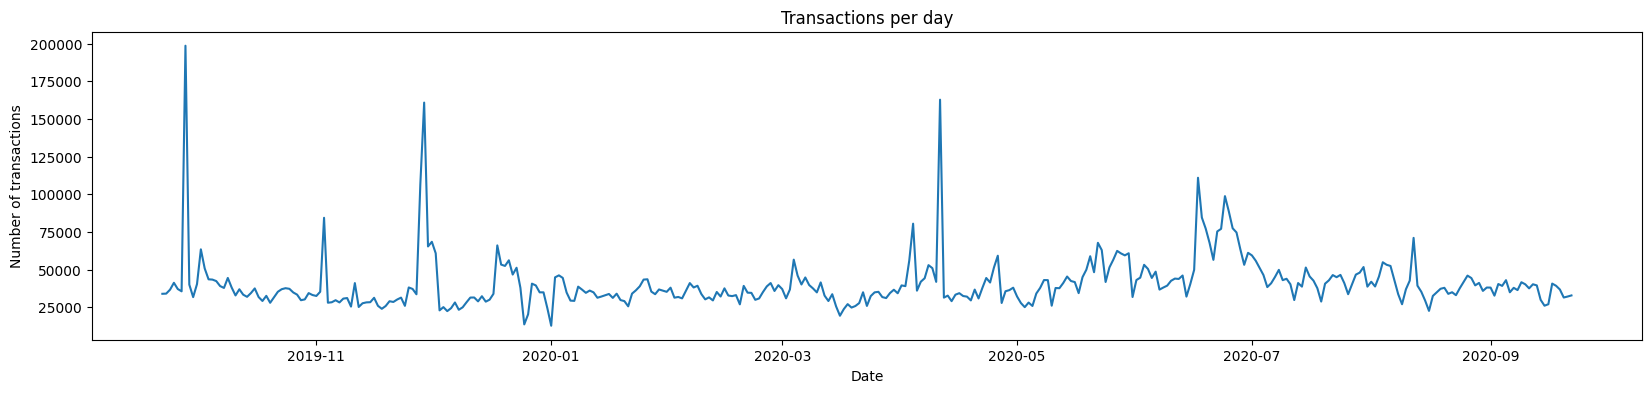

In [46]:
# How many transactions per day for the last 12 months
transaction_12_months = get_recent_data(transaction_data_changed, months=12)
transaction_by_date = transaction_12_months.groupby("t_dat")["article_id"].count()
transaction_by_date.head(10)

# plot
f, ax = plt.subplots(figsize=(20,4))
ax.plot(transaction_by_date)
ax.set_title("Transactions per day")
ax.set_xlabel("Date")
ax.set_ylabel("Number of transactions")

Thoughts:
- There are a few spikes in sales, maybe because of a new collection or something.

### Combining the data from all files 

In [47]:
# load all
articles_data, customers_data, transaction_data = load_all_data()

All changes made to the datasets until now:
- articles_data
  - Add a column that indicates whether the "detail_desc" column is non-null or not.
  - Remove pratically repeated columns: 
    - "department_name", "section_name", "detail_desc", "garment_group_name", "index_group_name", "index_name","perceived_colour_master_name", "perceived_colour_value_name", "colour_group_name", "graphical_appearance_name"
  - Maybe use OneHotEncoder to encode "index_code".
- customers_data
  - There are a few entries with "none" insted of "NONE", change them so they are the same.
- transaction_data
  - Change the "t_dat" format to DateTime
  - Maybe get data for the last 6 or whatever months. 

In [49]:
# merge articles and transaction 
transaction_data_changed = my_changes_to_transaction(transaction_data)
transaction_data_4_months = get_recent_data(transaction_data_changed, 4)
article_transaction_data = transaction_data_4_months.merge(articles_data, on="article_id", how="left")
article_transaction_data.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-05-22,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,827687003,0.0254,2,827687,Sunset HW Pull-on Woven Trs,272,Trousers,Garment Lower body,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,"Ankle-length trousers in soft, airy viscose tw..."
1,2020-05-22,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,859077005,0.0203,2,859077,Nora dress(1),265,Dress,Garment Full body,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Short, straight-style T-shirt dress in soft je..."
2,2020-05-22,000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060...,589549011,0.0414,2,589549,Shorts Straight Midsummer (1),274,Shorts,Garment Lower body,...,Denim shorts,F,Menswear,3,Menswear,56,Denim Men,1025,Shorts,5-pocket shorts in washed denim with hard-worn...
3,2020-05-22,000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060...,488561003,0.0331,2,488561,Teddy jogger.,274,Shorts,Garment Lower body,...,Shorts,F,Menswear,3,Menswear,21,Contemporary Casual,1025,Shorts,Knee-length shorts in soft washed cotton with ...
4,2020-05-22,000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060...,685814003,0.0331,2,685814,RICHIE HOOD,308,Hoodie,Garment Upper body,...,Heavy Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Hoodie in sweatshirt fabric made from a cotton...


In [50]:
article_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5707422 entries, 0 to 5707421
Data columns (total 29 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    int64         
 3   price                         float64       
 4   sales_channel_id              int64         
 5   product_code                  int64         
 6   prod_name                     object        
 7   product_type_no               int64         
 8   product_type_name             object        
 9   product_group_name            object        
 10  graphical_appearance_no       int64         
 11  graphical_appearance_name     object        
 12  colour_group_code             int64         
 13  colour_group_name             object        
 14  perceived_colour_value_id     int64         
 15  perceived_colour_value_name   ob

Text(0, 0.5, 'category')

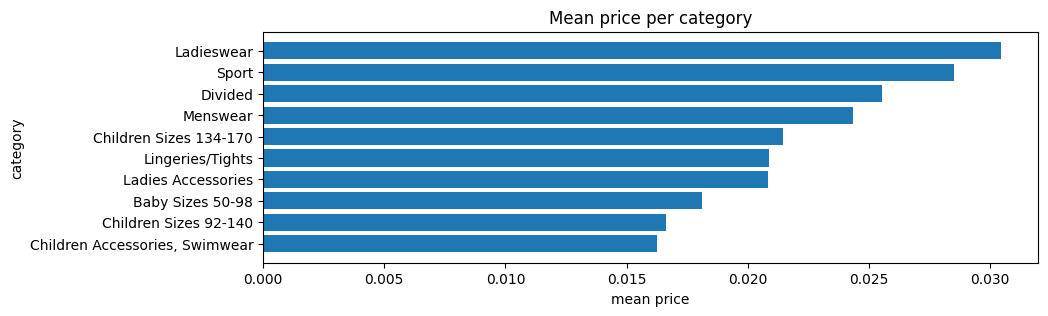

In [51]:
# Find the mean price of each category
mean_price_per_category = article_transaction_data.groupby("index_name")["price"].mean().sort_values()

# plot
f, ax = plt.subplots(figsize=(10,3))
ax.barh(mean_price_per_category.index, mean_price_per_category.values)
ax.set_title("Mean price per category")
ax.set_xlabel("mean price")
ax.set_ylabel("category")

Thoughts: 
- Ladieswear and Sport are most expensive.
- Children and Babied are least expensive.

Text(0, 0.5, 'product group')

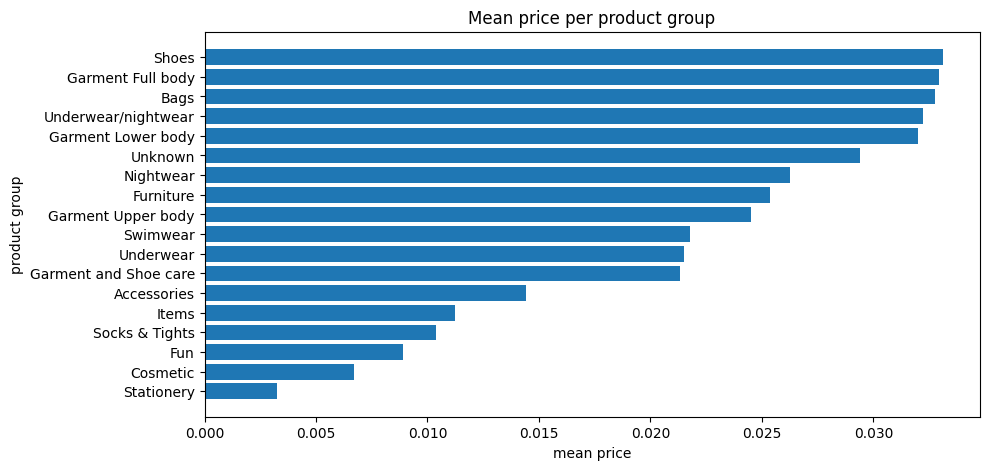

In [52]:
# Find the mean price of each product group
mean_price_per_product = article_transaction_data.groupby("product_group_name")["price"].mean().sort_values()

# plot
f, ax = plt.subplots(figsize=(10,5))
ax.barh(mean_price_per_product.index, mean_price_per_product.values)
ax.set_title("Mean price per product group")
ax.set_xlabel("mean price")
ax.set_ylabel("product group")

Thoughts:
- Shoes and Garment Full body are most expensive.
- Stationery and Cosmetic are least expensive.

Text(0, 0.5, 'product group')

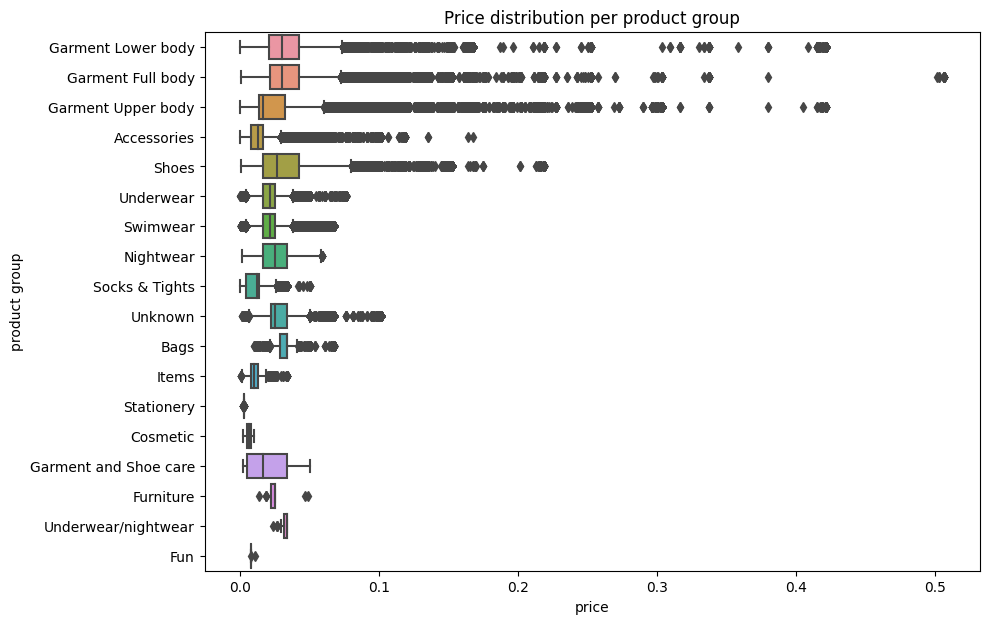

In [53]:
# Find the price distributions of each product group
f, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(article_transaction_data, x="price", y="product_group_name")
ax.set_title("Price distribution per product group")
ax.set_xlabel("price")
ax.set_ylabel("product group")

Thoughts:
- Garment full, upper, lower body have the biggest variance in prices
- Shoes and Accesorries are not far behind

In [54]:
# people who bougth the most stuff
transaction_data_4_months["customer_id"].value_counts().head(10)

b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a51bac507ffc2bf1b741    436
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    406
a3ab708684132c6bbd3dad7aa41f9b9c7d1c95d7d5cb1a3a052905191e858566    390
4308983955108b3af43ec57f0557211e44462a5633238351fff14c8b51f16093    384
03fdb0bf2d9ff8ba23e1b4aef53709119aad5bc83691d89293a01a52b93d7370    365
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    358
98e6d2f440e7b29dc139b2e911f41adc1f814e09f16aca6e373041671ab2bdeb    356
67931690bdf18d2e328854ae772cd5ce2505fdc11164693998b13e706db0bb56    350
d80ed4ababfa96812e22b911629e6bcbf5093769051ea447e2b696ac98a3dae9    338
8a9d4d7e454a745d3ac77645ca8afd7123b1f3d5d4e4bf6c7de13c9e7bc54f8e    338
Name: customer_id, dtype: int64

Thoughts:
- 10 people have bought more than 400 articles each in the last 6 months

In [55]:
# Full Statistics
number_of_customers = len(transaction_data["customer_id"].unique())
print(f"Number of unique customers: {number_of_customers}")

number_of_customers_12_months = len(transaction_12_months["customer_id"].unique())
print(f"Number of unique customers in the last 12 months: {number_of_customers_12_months}")

number_of_customers_6_months = len(transaction_data_4_months["customer_id"].unique())
print(f"Number of unique customers in the last 6 months: {number_of_customers_6_months}")

number_of_all_articles = len(articles_data["article_id"].unique())
print(f"Number of unique articles: {number_of_all_articles}")

number_of_articles_bought = len(transaction_data["article_id"].unique())
print(f"Number of unique articles bought: {number_of_articles_bought}")

number_of_articles_bought_12_months = len(transaction_12_months["article_id"].unique())
print(f"Number of unique articles bought in the last 12 months: {number_of_articles_bought_12_months}")

number_of_articles_bought_6_months = len(transaction_data_4_months["article_id"].unique())
print(f"Number of unique articles bought in the last 6 months: {number_of_articles_bought_6_months}")

number_of_transactions = len(transaction_data)
print(f"Total number of transactions: {number_of_transactions}")

number_of_transactions_12_months = len(transaction_12_months)
print(f"Number of transactions in the last 12 months: {number_of_transactions_12_months}")

number_of_transactions_6_months = len(transaction_data_4_months)
print(f"Number of transactions in the last 6 months: {number_of_transactions_6_months}")

Number of unique customers: 1362281
Number of unique customers in the last 12 months: 995078
Number of unique customers in the last 6 months: 627334
Number of unique articles: 105542
Number of unique articles bought: 104547
Number of unique articles bought in the last 12 months: 70976
Number of unique articles bought in the last 6 months: 47225
Total number of transactions: 31788324
Number of transactions in the last 12 months: 14932373
Number of transactions in the last 6 months: 5707422


### All changes that could be usefull

In [56]:
def all_changes(articles, customers, transactions, encode_articles_index=False, months=25):
    """
    Applies all changes to all data. 
    Has the option to encode the "index_code" in the articles data. (False if not specified)
    Has the option to get only the most recent months of data from transactions data. (all data if not specified)

    Args:
        articles (dataframe): The articles dataframe to be changed.  
        
        customers (dataframe): The customers dataframe to be changed.
        
        transactions (dataframe): The transactions dataframe to be changed.
        
        encode_articles_index (bool, optional): Use One Hot Encoder on the "index_code" from articles. Defaults to False.
        
        months (int, optional): Get most recent months of data from transactions. Defaults to full data.

    Returns:
        changed_articles, changed_customers, changed_transactions : The three final dataframes.
    """
    changed_articles = my_changes_to_articles(articles, encode_articles_index)
    changed_customers = my_changes_to_customers(customers)
    changed_transactions = my_changes_to_transaction(transactions)
    changed_transactions_months = get_recent_data(changed_transactions, months=months)
    
    return changed_articles, changed_customers, changed_transactions_months

## Final Everything we know

### articles data
- article_id
  - Unique id for every article of clothing
- index_group_number, index_group_name
  - categories, both have the same function and the same data
  - these have 5 categories
- index_code, index_name
  - sub-categories, both have the same function and the same data
  - "index_code" is capital letters not numbers
  - both have 10 categories
  - Ladieswear has the most articles
  - Combined, the two children categories have second most articles
  - Sport category has the least articles
- perceived_colour_master_id, perceived_colour_master_name
  - both have the same function and the same data
  - "-1" is the same as "Unknown"
- perceived_colour_value_id, perceived_colour_value_name
  - both have the same function and the same data
  - "-1" is the same as "Unknown"
- colour_group_code, colour_group_name
  - both have the same function and the same data
  - "-1" is the same as "Unknown"
  - Black has almost twice the number of articles of second place
  - Dark Blue and White are the next most popular colours overall
- graphical_appearance_no, graphical_appearance_name
  - both have the same function and the same data
  - "-1" is the same as "Unknown"
  - Solid is single handedly at the top. 
  - All over pattern is single handedly second. 
- garment_group_no, garment_group_name
  - both have the same function and the same data
  - both have 21 categories
  - Jersey Fancy are the most popular garment groups.
  - Dressed and Special Offers have least number of articles.
- department_no, department_name - almost the same 
  - department_no has 4 more categories
- section_no, section_name - almost the same
  - section_no has 1 more category
  - Women's Everyday Collection and Divided Collection have the most articles 
  - Ladies Other has the least number of articles
- NOT the same, regardless of name
  - "product_code", "product_name"
  - "product_type_no", "product_type_name
- detail_desc
  - description of the articles
  - can be the same for many articles
  - has missing values

Most correlated columns (> 0.1):
  - "garment_group_no" and "product_type_no": -0.461593 
  - "department_no" and "index_group_no" : 0.453340
  - "department_no" and "section_no": 0.349181
  - "garment_group_no" and "section_no": 0.217788
  - "perceived_colour_master_id" and "colour_group_code": -0.177083
  - "index_group_no" and "garment_group_no": -0.144313
  - "department_no" and "colour_group_code": 0.119798
  - "section_no" and "product_type_no": -0.118532

### customers data
- customer_id
  - Unique id for every customer
- FN
  - 1 if the customer receives fashion news
  - Majority are not subscribed.
- Active
  - 1 if the customer is active for communication
- fashion_news_frequency
  - how often the customer receives news
    - 'Regularly', 'Monthly', 'None'
- club_member_status 
  - 'ACTIVE', 'PRE-CREATE', 'LEFT CLUB' 
  - 93% have active club status. Very few people have left. 
- age
  - Most customers are 18-25
- postal_code

### transaction data
- customer_id
  - Number of unique customers: 1362281
  - Number of unique customers in the last 12 months: 995078
  - Number of unique customers in the last 6 months: 748053
  - 10 people have bought more than 400 articles each in the last 6 months
- article_id
  - Number of unique articles: 105542
  - Number of unique articles bought: 104547
  - Number of unique articles bought in the last 12 months: 70976
  - Number of unique articles bought in the last 6 months: 51478
  - Total number of transactions: 31788324
  - Number of transactions in the last 12 months: 14932373
  - Number of transactions in the last 6 months: 8185912
- t_dat
  - date of the transaction (yyyy-mm-dd)
  - 2020-09-22 - the last date for which we have data
  - 2018-09-20 - the first date for which we have data
- price
  - not a currency
- sales_channel_id:  1 - in-person, 2 - online
  - Online sales are two times more than in-person overall, three times in the last 6 months

### Overall
- price per category
  - Ladieswear and Sport are most expensive.
  - Children and Babied are least expensive.
- price per product group
  - Shoes and Garment Full body are most expensive.
  - Stationery and Cosmetic are least expensive.
  - Garment full, upper, lower body, Shoes and Accesorries have the biggest variance in prices.
- categories by price
  - Ladieswear and Sport are most expensive.
  - Children and Babied are least expensive.

### All possible changes for the datasets until now:
- articles_data
  - Add a column that indicates whether the "detail_desc" column is non-null or not.
  - Remove pratically repeated columns: 
    - "department_name", "section_name", "detail_desc", "garment_group_name", "index_group_name", "index_name","perceived_colour_master_name", "perceived_colour_value_name", "colour_group_name", "graphical_appearance_name"
  - Maybe use OneHotEncoder to encode "index_code". If you're going to use it.
- customers_data
  - There are a few entries with "none" insted of "NONE", change them so they are the same.
- transaction_data
  - Change the "t_dat" format to DateTime
  - Maybe get data for the last 4 or whatever months. 

## After Understanding the data

The Only needed functions to procede in any way after loading data

In [57]:
def my_changes_to_articles(articles_data, encode=False):
    """
    Applies all changes I felt are usefull to the articles_data.

    Args:
        articles_data (dataframe): The original dataframe.
        
        encode (Bool): Should the "index_code" be encoded with One Hot Encoder. (False if not specified)
    Returns:
        articles_data_new (dataframe): The changed datarame.
    """
    # make a copy of the original data before changing it
    articles_data_copy = articles_data.copy()
    # add a column that indicates whether the "detail_desc" column is non-null or not
    articles_data_copy["has_desc"] = articles_data['detail_desc'].notnull()
    # Remove pratically repeated columns 
    columns_to_drop = ["department_name", "section_name", "detail_desc",
                    "garment_group_name", "index_group_name", 
                    "index_name", "perceived_colour_master_name",
                    "perceived_colour_value_name", "colour_group_name",
                    "graphical_appearance_name"]
    articles_data_copy.drop(columns_to_drop, axis='columns', inplace=True)
    if encode :
        # Encode "index_code"
        # use OneHotEncoder because there is nno logical ordering in "index_code"
        from sklearn.preprocessing import OneHotEncoder
        ohe = OneHotEncoder()
        columns_to_ohe = ["index_code"]
        ohe_data = ohe.fit_transform(articles_data_copy[columns_to_ohe]).toarray()
        ohe_df = pd.DataFrame(ohe_data, columns=ohe.categories_)
        articles_data_copy = pd.concat([articles_data_copy, ohe_df], axis=1)
    
    return articles_data_copy

def my_changes_to_customers(customers_data):
    """
    Applies all changes I felt are usefull to the customers_data.

    Args:
        customers_data (dataframe): The original data.

    Returns:
        customers_data_copy (dataframe): The new data.
    """
    # make a copy of the original data before changing anything
    customers_data_copy = customers_data.copy()
    # there are a few entries with "none" insted of "NONE", change them so they are the same
    condition = customers_data_copy["fashion_news_frequency"] != "None"
    customers_data_copy["fashion_news_frequency"] = customers_data_copy["fashion_news_frequency"].where(condition, "NONE")
    
    return customers_data_copy

def my_changes_to_transaction(transaction_data):
    """
    Applies all changes I think are useful to transaction data. 
    Only changes the "t_dat" to datetime.

    Args:
        transaction_data (dataframe): The dataframe to change.

    Returns:
        transaction_data_copy: The changed dataframe.
    """
    # make a copy before changing 
    transaction_data_copy = transaction_data.copy()
    # change to datetime
    transaction_data_copy['t_dat'] = pd.to_datetime(transaction_data_copy['t_dat'])

    return transaction_data_copy

def get_recent_data(transaction_data, months=6):
    """
    Returns only data from the last months. How many months can be chosen (6 if not defined).

    Args:
        transaction_data (dataframe): The dataframe to filter.
        months (int): The months offset number.

    Returns:
        new_data (dataframe): Dataframe containing only data from the last few months.
    """
    # get the last date in the database
    last_date = transaction_data["t_dat"].max()
    # offset by specific time 
    some_time_ago = last_date - pd.DateOffset(months=months)
    # filter dataframe
    new_data = transaction_data[transaction_data["t_dat"] >= some_time_ago]
    
    return new_data

def all_changes(articles, customers, transactions, encode_articles_index=False, months=25):
    """
    Applies all changes to all data. 
    Has the option to encode the "index_code" in the articles data. (False if not specified)
    Has the option to get only the most recent months of data from transactions data. (all data if not specified)

    Args:
        articles (dataframe): The articles dataframe to be changed.  
        
        customers (dataframe): The customers dataframe to be changed.
        
        transactions (dataframe): The transactions dataframe to be changed.
        
        encode_articles_index (bool, optional): Use One Hot Encoder on the "index_code" from articles. Defaults to False.
        
        months (int, optional): Get most recent months of data from transactions. Defaults to full data.

    Returns:
        changed_articles, changed_customers, changed_transactions : The three final dataframes.
    """
    changed_articles = my_changes_to_articles(articles, encode_articles_index)
    changed_customers = my_changes_to_customers(customers)
    changed_transactions = my_changes_to_transaction(transactions)
    changed_transactions_months = get_recent_data(changed_transactions, months=months)
    
    return changed_articles, changed_customers, changed_transactions_months

In [58]:
# load all data 
articles, customers, transactions = load_all_data()
# make all changes
articles, customers, transactions = all_changes(articles, customers, transactions, encode_articles_index=False, months=1)

# Trying recommendation strategies

### In Theory:
Focus on user-based recommendation with data from the last 1 month. If we have data for at least 12 items for a specific user, basically recommend these items.
If not, make the overall recommendations 12 by adding the most popular items, using simple item-based recommendation.    

In [3]:
# import everything that's needed to make the submissions file
import pandas as pd
import numpy as np
from tqdm import tqdm
import datetime
from collections import Counter

In [4]:
# load training data
transactions = load_transactions_train()

In [5]:
def get_recent_data(transaction_data, months=6):
    """
    Returns only data from the last months. How many months can be chosen (6 if not defined).

    Args:
        transaction_data (dataframe): The dataframe to filter.
        months (int): The months offset number.

    Returns:
        new_data (dataframe): Dataframe containing only data from the last few months.
    """
    # get the last date in the database
    last_date = transaction_data["t_dat"].max()
    # offset by specific time 
    some_time_ago = last_date - pd.DateOffset(months=months)
    # filter dataframe
    new_data = transaction_data[transaction_data["t_dat"] >= some_time_ago]
    
    return new_data

In [6]:
def preprocess_the_transactions(transactions, with_val=False, months=1):
    """
    Perform preprocessing on the transaction data for recommendation system:
    1. Convert the "t_dat" column to datetime format.
    2. Extract the last 1 month data.
    3. Leave the last 1 week data as validation set.
    4. Copy the training set and split it into 4 dataframes of equal size and drop duplicates.
    5. Create 4 dictionaries of purchases for each split of the training set.
    6. Calculate the recent popularity of each item in the training set and extract the 12 most popular items.
    
    Args:
    
        transactions (dataframe): DataFrame containing the transaction data with columns "t_dat", "customer_id", and "article_id".
                                
        with_val (bool): Whether or not to leave data for validation (False in not specified) 
    
        months (int): The last how many months of data.
        
    Returns:
    
        (tuple): A tuple of the following items:
        users_and_items_bought_1 (dict): A dictionary containing the purchases made by each user in the first split of the training set.
        
        users_and_items_bought_2 (dict): A dictionary containing the purchases made by each user in the second split of the training set.
        
        users_and_items_bought_3 (dict): A dictionary containing the purchases made by each user in the third split of the training set.
        
        users_and_items_bought_4 (dict): A dictionary containing the purchases made by each user in the fourth split of the training set.
        
        validation_set (dataframe): Only if "witch_val" is True. DataFrame containing the validation set with columns "t_dat", "customer_id", and "article_id".
        
        popular_items (list): A list containing the article_ids of the 12 most popular items in the training set.
    """
    
    # change "t_dat" to datetime
    # transactions = my_changes_to_transaction(transactions)
    transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

    # I'll use the last months of data
    # from tests looks like the most recent the data, the better the results...
    transactions = get_recent_data(transactions, months)

    if with_val:
        # leave the last 1 week of data for validation
        date_of_split = datetime.datetime(2020,9,16)
        validation_set = transactions.loc[transactions["t_dat"] >= date_of_split]   
        # the other is for training
        train = transactions.loc[transactions["t_dat"] < date_of_split]
    else:
        train = transactions

    # copy before changing and drop duplicates
    train_copy = train.drop_duplicates().copy()

    # not exactly sure why we do this but it produces better results (Saw a suggestion for this on the internet)
    # split and shuffle rows for the training data - 4 equal size dataframes
    split_1 = train_copy.sample(frac = 0.25, random_state = 12)
    train_copy = pd.concat([split_1, train_copy]).drop_duplicates(keep=False)
    split_2 = train_copy.sample(frac = 0.3333333, random_state = 12)
    train_copy = pd.concat([split_2, train_copy]).drop_duplicates(keep=False)
    split_3 = train_copy.sample(frac = 0.5, random_state = 12)
    train_copy = pd.concat([split_3, train_copy]).drop_duplicates(keep=False)
    split_4 = train_copy

    # Dictionary (user, all purchases by user) 
    users_and_items_bought_1 = split_1.groupby(['customer_id'])['article_id'].apply(list)
    users_and_items_bought_2 = split_2.groupby(['customer_id'])['article_id'].apply(list)
    users_and_items_bought_3 = split_3.groupby(['customer_id'])['article_id'].apply(list)
    users_and_items_bought_4 = split_4.groupby(['customer_id'])['article_id'].apply(list)
    
    # most popular items from the last month
    train = pd.concat([split_1, split_2], axis=0)
    if with_val:
        train['recent_popularity'] = train['t_dat'].apply(lambda x: 1/(date_of_split - x).days)
    else:
        last_date = datetime.datetime(2020,9,23)
        train['recent_popularity'] = train['t_dat'].apply(lambda x: 1/(last_date - x).days)
    popular_items_group = train.groupby(['article_id'])['recent_popularity'].sum().sort_values(ascending=False)
    _, popular_items = zip(*sorted(zip(popular_items_group, popular_items_group.keys()))[::-1])
    popular_items = list(popular_items)
    
    if with_val:
        return users_and_items_bought_1, users_and_items_bought_2, users_and_items_bought_3, users_and_items_bought_4, validation_set, popular_items
    else:
        return users_and_items_bought_1, users_and_items_bought_2, users_and_items_bought_3, users_and_items_bought_4, popular_items

In [7]:
# Mean Average Precision at k
def average_precision_k(real_values, recommendations, k=12):
    """
    Computes the average precision at K for a list of predicted items given the actual items.
    The Average Precision at K is the sum of precision at K where the item at the k-th rank is relevant
    divided by the total number of relevant items in the top K recommendations.
    
    Args:
        real_values (list): The list of items containing the real values.
        
        recommendations (list): The list of items containing the recommendations.
        
        k (int, optional): The maximum number of recommendations to consider. (12 if not specified)
    Returns:
        (float): The Average Precision at k score.
    """
    # check if there are any real values
    if not real_values:
        return 0.0
    
    score = 0.0
    num_hits = 0.0
    
    # check if the number of the recommendations is greater than k. If yes, get only the first k elements.
    if len(recommendations)>k:
        recommendations = recommendations[:k]
        
    # check if each recommendation is in the real_values and not in the already seen recommendations (no dulicate recommendations) 
    for index, recommendation in enumerate(recommendations):
        if recommendation in real_values and recommendation not in recommendations[:index]:
            num_hits += 1.0
            score += num_hits / (index + 1.0)
    
    return score / min(len(real_values), k)

def mean_average_precision_k(real_values, recommendations, k=12):
    """
    Averages the Average Precision at K for recommendations shown to many different users.
    
    Args:
        real_values (list): The list of items containing the real values.
        
        recommendations (list): The list of items containing the recommendations.
        
        k (int, optional): The maximum number of recommendations to consider. (12 if not specified)
    Returns:
        score (float): The mean Average Precision at K score for all individual recommendations.
    """
    all_values = []
    for real_values_per_user, recommendations_per_user in zip(real_values, recommendations):
        user_score = average_precision_k(real_values_per_user, recommendations_per_user, k)
        all_values.append(user_score)
        
    mean_result = np.mean(all_values)

    return mean_result

In [8]:
def get_all_bought_items_val(customer_item_df):
    """
    Get all the items bought by users during the validation period.

    Parameters:
    
    customer_item_df (DataFrame): A pandas DataFrame that contains the customer ID and article ID of items bought during the validation period.

    Returns:
    
    (tuple): A tuple containing two elements (lists):
    
                A list of all the items that were bought during the validation period.
                
                A list of all the users who made purchases during the validation period.
                
    """
    # Items bought by users in the validation period. Same as for the train set.
    items_users_bought_val = customer_item_df.groupby(['customer_id'])['article_id'].apply(list)

    # all users in the validation set
    users_val = items_users_bought_val.keys()

    # all items that were bought
    all_items_bought_val = []
    for user in users_val:
        all_items_bought_val.append(items_users_bought_val[user])
        
    return all_items_bought_val, users_val

In [9]:
def get_user_based_recommendation(users_items_bought, user_recommendations, user):
    """
    Gets recommendations for a user based on their past purchases. 

    Args:
        users_items_bought (dict): A dictionary where keys are user ids and values are lists of items the user has bought.
        
        user_recommendations (list): A list of items recommended to the user based on both user's previous puchases and item popularity.
        
        user (str): The user for whom the recommendations are being generated. 
    Returns:
        user_recommendations (list): The updated list of recommended items, with up to 12 new items based on the user's past purchases.
    """
    most_common_items_of_user = {k:v for k, v in Counter(users_items_bought[user]).most_common()}
    user_recommendations += list(most_common_items_of_user.keys())[:12]
    
    return user_recommendations

def make_recommendation(users, popular_items, users_items_1, users_items_2, users_items_3, users_items_4):
    """
    Generate recommendations for the given users based on the items they have previously bought and item pupularity.

    Args:
        users (list): A list of user IDs for whom to generate recommendations.

    Returns:
        final_recommendations (A list of lists): where each inner list contains 12 item IDs that are recommended for the corresponding user.
        
    """
    final_recommendations = []
    for user in tqdm(users):
        user_recommendations = []        
            
        if user in users_items_1.keys():
            user_recommendations = get_user_based_recommendation(users_items_1, user_recommendations, user)
        if user in users_items_2.keys():
            user_recommendations = get_user_based_recommendation(users_items_2, user_recommendations, user)
        if user in users_items_3.keys():
            user_recommendations = get_user_based_recommendation(users_items_3, user_recommendations, user)
        if user in users_items_4.keys():
            user_recommendations = get_user_based_recommendation(users_items_4, user_recommendations, user)
        
        # if we haven't gotten 12 recommendations add the most popular to make them 12
        user_recommendations += list(popular_items[:12 - len(user_recommendations)])
        final_recommendations.append(user_recommendations)

    return final_recommendations

The next cell was used for validation. 

In [10]:
# 4 dictionaries of purchases for users
# DataFrame containing the validation set
# a list containing the article_ids of the 12 most popular items in the training set.
users_items_1, users_items_2, users_items_3, users_items_4, validation_set, popular_items = preprocess_the_transactions(transactions, True)

# a list of all the items that were bought during the validation period.
# a list of all the users who made purchases during the validation period.
all_items_bought_val, users_val = get_all_bought_items_val(validation_set)

# a list of lists where each inner list contains 12 article_ids that are recommended for the corresponding user.
final_recommendations_val = make_recommendation(users_val, popular_items, users_items_1, users_items_2, users_items_3, users_items_4)

# the mean Average Precision at K score for all individual recommendations.
score_validation = mean_average_precision_k(all_items_bought_val, final_recommendations_val)

print("Mean APatK Validation:", score_validation)

100%|██████████| 68984/68984 [00:01<00:00, 34657.25it/s]


Mean APatK Validation: 0.022685158236466357


### Make submissions.csv 

In [11]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [12]:
transactions = load_transactions_train()

# 4 dictionaries of purchases for users
# DataFrame containing the validation set
# a list containing the article_ids of the 12 most popular items in the training set.
users_items_1, users_items_2, users_items_3, users_items_4, popular_items = preprocess_the_transactions(transactions)

# a list of lists where each inner list contains 12 article_ids that are recommended for the corresponding user.
recommedations = make_recommendation(submission['customer_id'], popular_items, users_items_1, users_items_2, users_items_3, users_items_4)    

final_predictions = []
for output in tqdm(recommedations):
    final_predictions.append(" ".join(["0"+str(x) for x in output]))

100%|██████████| 1371980/1371980 [01:15<00:00, 18124.07it/s]


In [13]:
submission['prediction'] = final_predictions
submission.to_csv("submissions.csv", index=False)
submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601043 0918522001 0924243001 0751471001 09...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0918522001 0924243001 0751471001 0918292001 09...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0794321007 0918522001 0924243001 0751471001 09...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0918522001 0924243001 0751471001 0918292001 09...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0918522001 0924243001 0751471001 0918292001 09...
